<a href="https://colab.research.google.com/github/olasupoAjayi/WaterNet/blob/main/Water_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Water Quality Prediction

## About Dataset

#### Context
Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

#### Content
The water_potability.csv file contains water quality metrics for 3276 different water bodies.

##### 1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

##### 2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

##### 3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

##### 4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

##### 5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

##### 6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

##### 7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

###### 9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

##### 10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.
(0) Water is not safe to drink and (1) Water is safe to drink

# Data Gathering

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
#This cell extracts R dataset to Python using pyreadr
#author of library to be cited later
#usually needs a restart of the runtime
#after reading d rds file, it writes it to csv
def convert_rds_to_csv():
  !pip install pyreadr
  import pyreadr

  drive.mount('/content/drive')
  result = pyreadr.read_r('/content/drive/MyDrive/Projects/2022/WaterResearch/dataset3_Gecco.RDS')
  df = result[None]

  df.to_csv('/content/drive/MyDrive/Projects/2022/WaterResearch/dataset3_Gecco.csv', index=False)

In [ ]:
#This extracts CSV dataset from Google drive using pandas.read_csv()

drive.mount('/content/drive')
#df = pd.read_csv('/content/drive/MyDrive/Projects/2022/WaterResearch/dataset0_Fake_water_potability.csv')
#df = pd.read_csv('/content/drive/MyDrive/Projects/2022/WaterResearch/dataset1_testbed_augmented.csv')
#df = pd.read_csv('/content/drive/MyDrive/Projects/2022/WaterResearch/dataset3_Gecco.csv', names=['Time', 'Temp', 'Chlorine', 'pH', 'Redox', 'Conductivity', 'Turbidity', 'Chlorine2', 'FlowRate1', 'FlowRate2', 'Potability'], skiprows=[0])
df = pd.read_csv('/content/drive/MyDrive/Projects/2022/WaterResearch/dataset5_drinking2.csv')
#dfa = pd.read_csv('/content/drive/MyDrive/Projects/2022/WaterResearch/dataset5_agric3.csv')
df.head(10)

Mounted at /content/drive


,id,pH,Sodium,Magnesium,Calcium,Chloride,Potassium,Carbonate,Sulphate,TDS,EC,TH,WQI,Potability
0,L1,7.3,77.5,32.6,81.4,63.6,2.0,419.7,68.2,640.0,1045.0,338.0,NaN,NaN
1,L2,7.5,36.1,31.1,42.4,19.5,1.6,273.3,57.1,400.0,645.0,234.0,NaN,NaN
2,L3,7.7,119.4,19.0,58.2,60.7,1.2,195.2,220.8,640.0,998.0,224.0,NaN,NaN
3,L4,6.0,117.1,29.7,145.4,37.3,2.7,580.7,190.1,950.0,1516.0,486.0,NaN,NaN
4,L5,7.0,45.1,23.4,49.6,23.4,1.2,248.9,74.9,410.0,658.0,220.0,NaN,NaN
5,L6,7.0,73.4,33.0,50.4,35.2,2.3,346.5,83.0,540.0,875.0,262.0,NaN,NaN
6,L7,7.2,121.9,29.7,67.8,47.2,1.2,195.2,310.1,740.0,1153.0,292.0,NaN,NaN
7,L8,7.3,54.1,16.6,56.6,24.5,1.2,297.7,45.1,420.0,676.0,210.0,NaN,NaN
8,L9,7.3,55.2,25.3,68.6,45.1,2.0,307.4,74.9,510.0,817.0,276.0,NaN,NaN
9,L10,7.2,59.8,32.6,57.4,31.2,3.1,341.6,80.2,530.0,848.0,278.0,NaN,NaN


# Exploratory Data Analysis

In [ ]:
dfa.head(10)

,id,RSC,PI,KR,MH,Na,SAR,SSP,EC,IWQI,USABLE
0,1,0.12,59.2,0.5,39.8,33.6,1.8,33.3,1045,NaN,NaN
1,2,-0.21,58.9,0.3,54.8,25.6,1.0,25.1,645,NaN,NaN
2,3,-1.28,72.2,1.2,35.0,53.8,3.5,53.7,998,NaN,NaN
3,4,-0.20,55.2,0.5,25.2,34.7,2.3,34.4,1516,NaN,NaN
4,5,-0.33,62.5,0.4,43.8,31.1,1.3,30.8,658,NaN,NaN
5,6,0.43,66.0,0.6,52.0,38.2,2.0,37.8,875,NaN,NaN
6,7,-2.64,63.6,0.9,42.0,47.7,3.1,47.6,1153,NaN,NaN
7,8,0.68,69.6,0.6,32.6,36.2,1.6,35.9,676,NaN,NaN
8,9,-0.48,58.7,0.4,37.9,30.7,1.4,30.3,817,NaN,NaN
9,10,0.04,60.9,0.5,48.4,32.5,1.6,31.9,848,NaN,NaN


In [ ]:
df.shape

(643, 14)

In [ ]:
dfa.shape

(356, 11)

In [ ]:
df.isnull().sum()

In [ ]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356 entries, 0 to 355
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      356 non-null    int64  
 1   RSC     356 non-null    float64
 2   PI      356 non-null    float64
 3   KR      356 non-null    float64
 4   MH      356 non-null    float64
 5   Na      356 non-null    float64
 6   SAR     356 non-null    float64
 7   SSP     356 non-null    float64
 8   EC      356 non-null    int64  
 9   IWQI    0 non-null      float64
 10  USABLE  0 non-null      float64
dtypes: float64(9), int64(2)
memory usage: 30.7 KB


In [ ]:
dfa.describe()

,id,RSC,PI,KR,MH,Na,SAR,SSP,EC,IWQI,USABLE
count,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,0.0,0.0
mean,178.500000,-3.064242,37.680056,0.643820,44.016011,40.891854,7.136236,34.762360,1810.786517,NaN,NaN
std,102.912584,7.917975,26.375834,0.606204,13.662433,23.917930,10.453207,19.607348,2480.481842,NaN,NaN
min,1.000000,-76.220000,0.200000,0.000000,16.900000,1.500000,0.000000,1.500000,320.000000,NaN,NaN
25%,89.750000,-3.525000,0.700000,0.200000,33.875000,23.950000,1.075000,21.450000,584.000000,NaN,NaN
50%,178.500000,-0.500000,43.600000,0.500000,43.700000,40.050000,2.550000,34.600000,1020.000000,NaN,NaN
75%,267.250000,0.000000,56.875000,0.900000,53.425000,59.725000,8.900000,48.725000,1615.000000,NaN,NaN
max,356.000000,3.660000,89.700000,3.700000,83.200000,89.400000,63.700000,83.300000,20084.000000,NaN,NaN


# Custom Dataset

## Data Prep

In [ ]:
#labelling script
def calculateWQI (row, thresh, weights = None):
  qi = []
  wqi = 0

  if (len(row) == len(thresh)) and (weights == None):
    #apply equal weights
    wi = 1
    rw = wi/len(row) #assuming a weight of 1 is given to each parameter
    tw = len(row) #same as sum rw
    for r in range(len(row)):
      qi.append(row[r] / thresh[r] * 100)
      wqi += (rw * qi[r])
    #print ("Row = {0}, WQI = {1}".format(row, wqi))
  else:
    if len(row) != len(weights) != len(thresh):
      return "ERROR"
    else:
      #apply different weights
      rw = []
      for r in range(len(row)):
        rw.append(weights[r]/sum(weights))
        qi.append(row[r] / thresh[r] * 100)
        wqi += (rw[r] * qi[r])
  return wqi

def setThresholds_Drinking():
  #pH, Sodium, Magnesium,	Calcium,	Chloride,	Potassium,	CO3*****************,	HCO3,	Sulphate,	TDS,	EC,	TH
  return [9.7, 200, 50, 75, 300, 12, 200, 500, 1200, 1700, 300]
  #check threshold 4 co3

def setThresholds_Agric():
  #RSC, PI, KR,	MH,	Na%,	SAR,	SSP, EC
  return [1.25, 70, 1.5, 50, 40, 18, 50, 750]

In [ ]:
##########DRINKING WATER#############

X = df.copy()
thresh = setThresholds_Drinking()

#handle all NA first
for row in range(len(X)):
  wqi = calculateWQI(X.loc[row, ["pH", "Sodium", "Magnesium", "Calcium", "Chloride", "Potassium", "Carbonate", "Sulphate", "TDS", "EC", "TH"]].values.flatten().tolist(), thresh, None)
  if wqi != "ERROR" and wqi < 50:
    X.at[row, "WQI"] = wqi
    X.at[row, "Potability"] = 1

  elif wqi != "ERROR" and wqi >= 50:
    X.at[row, "WQI"] = wqi
    X.at[row, "Potability"] = 0

  else:
    print ("ERROR! Possibly due to lenght mismatch between row, threshold or weights!")

X.to_csv('/content/drive/MyDrive/Projects/2022/WaterResearch/dataset5_drinking2_FILLED.csv', index=False)

In [ ]:
X.head(10)

In [ ]:
X.Potability.value_counts()

1.0    387
0.0    256
Name: Potability, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


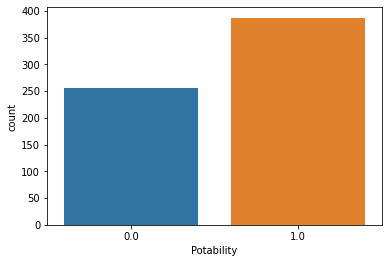

In [ ]:
sns.countplot(X['Potability'])
plt.show()

In [ ]:
###########IRRIGATION WATER
A = dfa.copy()
thresh = setThresholds_Agric()

#handle all NA first
for row in range(len(A)):
  iwqi = calculateWQI(A.loc[row, ['RSC', 'PI', 'KR', 'MH', 'Na', 'SAR', 'SSP', 'EC']].values.flatten().tolist(), thresh, None)
  if iwqi != "ERROR" and iwqi >= 50:
    A.at[row, "IWQI"] = iwqi
    A.at[row, "USABLE"] = 1

  elif iwqi != "ERROR" and iwqi < 50:
    A.at[row, "IWQI"] = iwqi
    A.at[row, "USABLE"] = 0

  else:
    print ("ERROR! Possibly due to lenght mismatch between row, threshold or weights!")

#write CSV to file
A.to_csv('/content/drive/MyDrive/Projects/2022/WaterResearch/dataset5_Agric_FILLED.csv', index=False)


In [ ]:
A.head(10)

,id,RSC,PI,KR,MH,Na,SAR,SSP,EC,IWQI,USABLE
0,1,0.12,59.2,0.5,39.8,33.6,1.8,33.3,1045,63.379762,1.0
1,2,-0.21,58.9,0.3,54.8,25.6,1.0,25.1,645,50.337302,1.0
2,3,-1.28,72.2,1.2,35.0,53.8,3.5,53.7,998,68.144246,1.0
3,4,-0.20,55.2,0.5,25.2,34.7,2.3,34.4,1516,64.631448,1.0
4,5,-0.33,62.5,0.4,43.8,31.1,1.3,30.8,658,51.432242,1.0
5,6,0.43,66.0,0.6,52.0,38.2,2.0,37.8,875,71.445437,1.0
6,7,-2.64,63.6,0.9,42.0,47.7,3.1,47.6,1153,51.132837,1.0
7,8,0.68,69.6,0.6,32.6,36.2,1.6,35.9,676,65.043849,1.0
8,9,-0.48,58.7,0.4,37.9,30.7,1.4,30.3,817,50.248115,1.0
9,10,0.04,60.9,0.5,48.4,32.5,1.6,31.9,848,60.917361,1.0


In [ ]:
A.USABLE.value_counts()

0.0    182
1.0    174
Name: USABLE, dtype: int64

#Data Visualization

In [ ]:
#convert True/False to 0/1 - Yes reversed True means they might b a problem with the water, hence not safe - 0
# false means - no problem - hence safe
df.Potability = df.Potability.replace({True: 0, False: 1})

In [ ]:
df.isnull().sum()

In [ ]:
#deal with Nulls

df.fillna(df.mean(), inplace=True)
df.isnull().sum()

###############Changed from fillna() to dropna() - 10/01/2022
#df = df.dropna(subset = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity'])
#df.isnull().sum()

In [ ]:
df.head()

In [ ]:
df.Potability.value_counts()

1    137840
0      1726
Name: Potability, dtype: int64

In [ ]:
sns.countplot(df['Potability'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


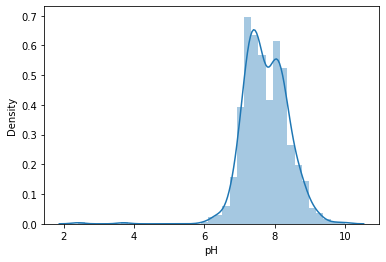

In [ ]:
sns.distplot(df['pH'])
plt.show()

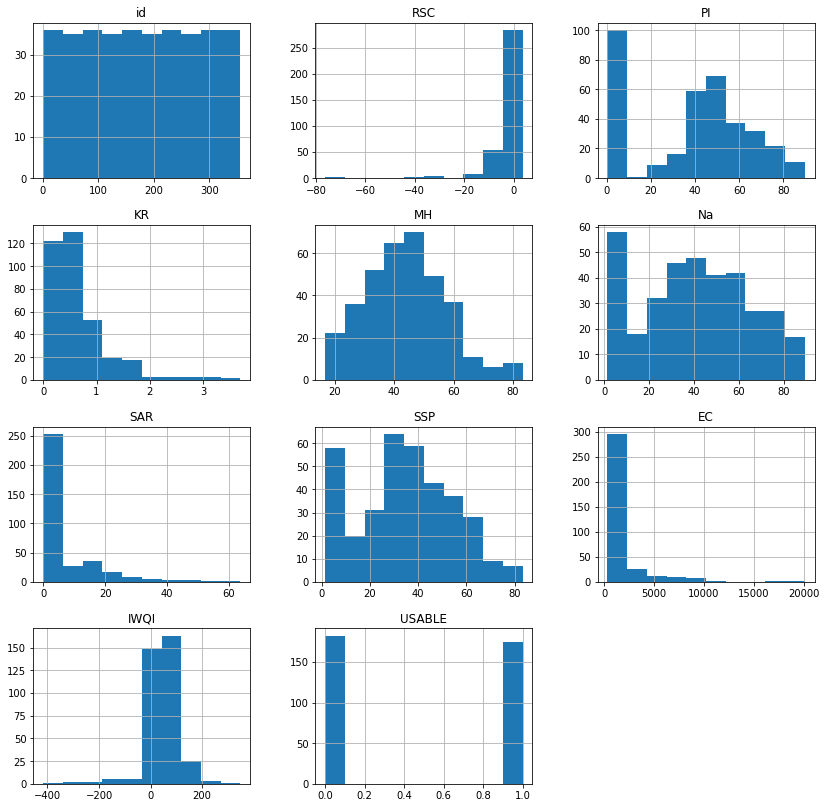

In [ ]:
#df.hist(figsize=(14,14))
A.hist(figsize=(14,14))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-200.0, 200.0)

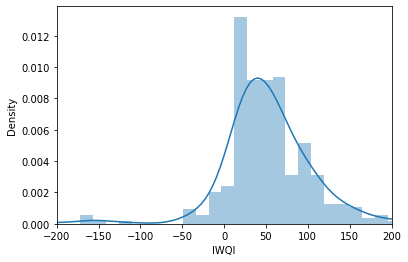

In [ ]:
#sns.distplot(df['WQI'])
#plt.show()

sns.distplot(A['IWQI'])
plt.xlim(-200, 200)

In [ ]:
sns.distplot(df['Sulphate'])
plt.show()

In [ ]:
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(),annot=True,cmap='terrain')
plt.show()

In [ ]:
df.boxplot(figsize=(14,7))

In [ ]:
df.loc[df.Potability==1].head()

In [ ]:
df.loc[df.Potability==0].head()

In [ ]:
df.loc[df.Chlorine==0.8]

# PREDICTION

## Predicting Potability using Decision Tree

In [ ]:
#X = df.drop(['Time','Temp', 'FlowRate1', 'FlowRate2','Potability'],axis=1)
#Y= df['Potability']

#X2 = X.drop(['id','WQI','Potability'],axis=1)
#Y = X['Potability']

A2 = A.drop(['id','IWQI','USABLE'],axis=1)
Y = A['USABLE']


In [ ]:
def split_scale():
  #X_train, X_test, Y_train, Y_test = train_test_split(X2,Y, test_size= 0.2, random_state=101,shuffle=True) #random_state = 0, shuffle=False) #
  X_train, X_test, Y_train, Y_test = train_test_split(A2,Y, test_size= 0.2, random_state=101,shuffle=True)

  sc_X = StandardScaler()
  X_train = sc_X.fit_transform(X_train)
  X_test = sc_X.transform(X_test)

  return X_train, X_test, Y_train, Y_test

def split_scale2(Xs):
  X_train, X_test, Y_train, Y_test = train_test_split(Xs,Y, test_size= 0.2, random_state=101,shuffle=True) #random_state = 0, shuffle=False) #
  sc_X = StandardScaler()
  X_train = sc_X.fit_transform(X_train)
  X_test = sc_X.transform(X_test)
  return X_train, X_test, Y_train, Y_test

def printResult(prediction, y_test):
  from sklearn.metrics import r2_score, mean_squared_error, accuracy_score,confusion_matrix,classification_report

  print(f"Accuracy Score = {accuracy_score(y_test,prediction)*100}")
  print(f"Confusion Matrix =\n {confusion_matrix(y_test,prediction)}")
  print(f"Classification Report =\n {classification_report(y_test,prediction)}")
  print('R2 score = ', r2_score(y_test,prediction))
  print('mean_sqrd_error  = ', mean_squared_error(y_test,prediction))
  print('root_mean_squared error = ', np.sqrt(mean_squared_error(y_test,prediction)))

## Train Decision Tree Classifier and check accuracy

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion= 'gini', min_samples_split= 10, splitter= 'best')

X_train, X_test, Y_train, Y_test = split_scale()
dt.fit(X_train,Y_train)

prediction = dt.predict(X_test)

printResult(prediction, Y_test)

Accuracy Score = 94.44444444444444
Confusion Matrix =
 [[32  4]
 [ 0 36]]
Classification Report =
               precision    recall  f1-score   support

         0.0       1.00      0.89      0.94        36
         1.0       0.90      1.00      0.95        36

    accuracy                           0.94        72
   macro avg       0.95      0.94      0.94        72
weighted avg       0.95      0.94      0.94        72

R2 score =  0.7777777777777778
mean_sqrd_error  =  0.05555555555555555
root_mean_squared error =  0.23570226039551584


In [ ]:
#res = dt.predict([[5.735724, 158.318741,25363.016594,7.728601,377.543291,568.304671,13.626624,75.952337,4.732954]])[0]
#res = dt.predict([[0.17, 0.567335, 727.280805, 211.0,	0.028395,	0.16]])[0]
#res



## Apply Hyper Parameter Tuning

In [ ]:
'''
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = DecisionTreeClassifier()
criterion = ["gini", "entropy"]
splitter = ["best", "random"]
min_samples_split = [2,4,6,8,10,12,14]

# define grid search
grid = dict(splitter=splitter, criterion=criterion, min_samples_split=min_samples_split)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_dt = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv,
                           scoring='accuracy',error_score=0)
grid_search_dt.fit(X_train, Y_train)
'''

In [ ]:
'''
print(f"Best: {grid_search_dt.best_score_:.3f} using {grid_search_dt.best_params_}")
means = grid_search_dt.cv_results_['mean_test_score']
stds = grid_search_dt.cv_results_['std_test_score']
params = grid_search_dt.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

print("Training Score:",grid_search_dt.score(X_train, Y_train)*100)
print("Testing Score:", grid_search_dt.score(X_test, Y_test)*100)
'''

##Prediction using Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

rfc = RandomForestClassifier()
X_train, X_test, Y_train, Y_test = split_scale()
rfc.fit(X_train,Y_train)

prediction= rfc.predict(X_test)

printResult(prediction, Y_test)

X_train2 = X_train.copy()

Accuracy Score = 94.44444444444444
Confusion Matrix =
 [[33  3]
 [ 1 35]]
Classification Report =
               precision    recall  f1-score   support

         0.0       0.97      0.92      0.94        36
         1.0       0.92      0.97      0.95        36

    accuracy                           0.94        72
   macro avg       0.95      0.94      0.94        72
weighted avg       0.95      0.94      0.94        72

R2 score =  0.7777777777777778
mean_sqrd_error  =  0.05555555555555555
root_mean_squared error =  0.23570226039551584


In [ ]:
#res = dt.predict([[6.9, 0.17, 0.567335, 727.280805, 211.0,	0.028395,	0.16, 949.0,	949.0]])[0]
#res = dt.predict([[0.17, 7.567335, 727.280805, 211.0,	0.028395,	0.16]])[0]
#res

## using Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
X_train, X_test, Y_train, Y_test = split_scale()
lr.fit(X_train,Y_train)

prediction= lr.predict(X_test)
#prediction2 = np.rint(prediction)

printResult(prediction, Y_test)

Accuracy Score = 91.66666666666666
Confusion Matrix =
 [[34  2]
 [ 4 32]]
Classification Report =
               precision    recall  f1-score   support

         0.0       0.89      0.94      0.92        36
         1.0       0.94      0.89      0.91        36

    accuracy                           0.92        72
   macro avg       0.92      0.92      0.92        72
weighted avg       0.92      0.92      0.92        72

R2 score =  0.6666666666666667
mean_sqrd_error  =  0.08333333333333333
root_mean_squared error =  0.28867513459481287


## Using SVR

In [ ]:
from sklearn.svm import SVC
sv = SVC(kernel = 'linear')#'rbf')
X_train, X_test, Y_train, Y_test = split_scale()

sv.fit(X_train, Y_train)

prediction= sv.predict(X_test)
#prediction2 = np.floor(prediction *10) #prediction2 = np.rint(prediction) #mapping 2 nearest whole numb - to a regression (continuous target variable) to classification (discrete target variable)

printResult(prediction, Y_test)

Accuracy Score = 93.05555555555556
Confusion Matrix =
 [[34  2]
 [ 3 33]]
Classification Report =
               precision    recall  f1-score   support

         0.0       0.92      0.94      0.93        36
         1.0       0.94      0.92      0.93        36

    accuracy                           0.93        72
   macro avg       0.93      0.93      0.93        72
weighted avg       0.93      0.93      0.93        72

R2 score =  0.7222222222222222
mean_sqrd_error  =  0.06944444444444445
root_mean_squared error =  0.26352313834736496


##Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

X_train, X_test, Y_train, Y_test = split_scale()
nb.fit(X_train, Y_train)

prediction= nb.predict(X_test)

printResult(prediction, Y_test)

Accuracy Score = 86.11111111111111
Confusion Matrix =
 [[40  5]
 [ 5 22]]
Classification Report =
               precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        45
         1.0       0.81      0.81      0.81        27

    accuracy                           0.86        72
   macro avg       0.85      0.85      0.85        72
weighted avg       0.86      0.86      0.86        72

R2 score =  0.40740740740740744
mean_sqrd_error  =  0.1388888888888889
root_mean_squared error =  0.37267799624996495


## Auto Feature Selection
### Using Recursive Feature Elimination + SVC



In [ ]:
A2.columns

Index(['RSC', 'PI', 'KR', 'MH', 'Na', 'SAR', 'SSP', 'EC'], dtype='object')

In [ ]:
from sklearn.model_selection import StratifiedKFold #RepeatedStratifiedKFold
from matplotlib.pyplot import figure
from sklearn.feature_selection import RFECV

##############################################################
rfecv = RFECV(SVC(kernel = 'linear'), step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train, Y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', A2.columns[rfecv.support_])
print('Original features :', A2.columns)


Optimal number of features : 7
Best features : Index(['RSC', 'PI', 'KR', 'MH', 'Na', 'SAR', 'EC'], dtype='object')
Original features : Index(['RSC', 'PI', 'KR', 'MH', 'Na', 'SAR', 'SSP', 'EC'], dtype='object')


In [ ]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score \n of number of selected features")
lines = plt.plot(range(1, len(rfecv.grid_scores_[:,1]) + 1), rfecv.grid_scores_[:,1])
#plt.plot(rfecv.n_features_, rfecv.grid_scores_[:,1], marker='o', label='Optimal number of feature')
plt.legend (lines, ['best'] )
plt.show()

In [ ]:
##Rank features

importance_values = np.absolute(rfecv.estimator_.coef_) #rfecv.estimator_.feature_importances_
importance_features_sorted_all = pd.DataFrame()
importance_features_sorted = pd.DataFrame(importance_values.reshape([-1, len(A2.columns[rfecv.support_])]), columns=A2.columns[rfecv.support_]).mean(axis=0).sort_values(ascending=False).to_frame()
importance_features_sorted.rename(columns={0: 'feature_importance'}, inplace=True)
importance_features_sorted['ranking']= importance_features_sorted['feature_importance'].rank(ascending=False)
importance_features_sorted['model'] = 'RandomForestClassifier'

print('Show all features, ranked by Feature Importance')
display(importance_features_sorted.drop('model', axis=1).head(X_train.shape[1]))
importance_features_sorted_all = importance_features_sorted_all.append(importance_features_sorted)

Show all features, ranked by Feature Importance


,feature_importance,ranking
RSC,4.980173,1.0
EC,2.668954,2.0
SAR,1.622580,3.0
Na,0.907881,4.0
PI,0.299117,5.0
KR,0.291719,6.0
MH,0.259527,7.0


## RFE + RF

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold
from matplotlib.pyplot import figure
from sklearn.feature_selection import RFECV

##############################################################

#kfold = StratifiedKFold(n_splits=10, random_state=1132, shuffle=True)
rfecv = RFECV(estimator=RandomForestClassifier().set_params(), step=1, cv=5, scoring='accuracy')
rfecv.fit(X_train, Y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', A2.columns[rfecv.support_])
print('Original features :', A2.columns)


Optimal number of features : 5
Best features : Index(['RSC', 'PI', 'Na', 'SAR', 'EC'], dtype='object')
Original features : Index(['RSC', 'PI', 'KR', 'MH', 'Na', 'SAR', 'SSP', 'EC'], dtype='object')


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


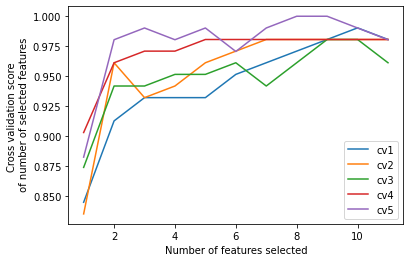

In [ ]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score \n of number of selected features")
lines = plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.legend(lines[:],['cv1', 'cv2','cv3','cv4','cv5'])
plt.show()

In [ ]:
##Rank features

importance_values = rfecv.estimator_.feature_importances_
importance_features_sorted_all = pd.DataFrame()
importance_features_sorted = pd.DataFrame(importance_values.reshape([-1, len(A2.columns[rfecv.support_])]), columns=A2.columns[rfecv.support_]).mean(axis=0).sort_values(ascending=False).to_frame()
importance_features_sorted.rename(columns={0: 'feature_importance'}, inplace=True)
importance_features_sorted['ranking']= importance_features_sorted['feature_importance'].rank(ascending=False)
importance_features_sorted['model'] = 'RandomForestClassifier'

print('Show all features, ranked by Feature Importance')
display(importance_features_sorted.drop('model', axis=1).head(X_train.shape[1]))
importance_features_sorted_all = importance_features_sorted_all.append(importance_features_sorted)

Show all features, ranked by Feature Importance


,feature_importance,ranking
RSC,0.309706,1.0
Na,0.212282,2.0
SAR,0.195739,3.0
PI,0.180721,4.0
EC,0.101552,5.0


## Feature Ranking - LR

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib.pyplot import figure
from sklearn.feature_selection import RFECV

##############################################################
#kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1132)
rfecv = RFECV(LogisticRegression(), step=1, cv=5, scoring='accuracy', verbose=0)
rfecv.fit(X_train, Y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', A2.columns[rfecv.support_])
print('Original features :', A2.columns)


Optimal number of features : 5
Best features : Index(['RSC', 'PI', 'Na', 'SAR', 'EC'], dtype='object')
Original features : Index(['RSC', 'PI', 'KR', 'MH', 'Na', 'SAR', 'SSP', 'EC'], dtype='object')


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


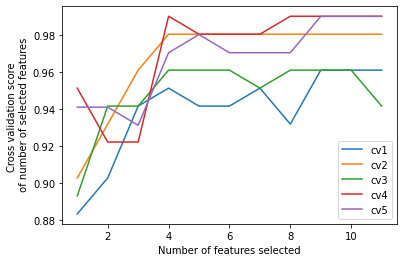

In [ ]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score \n of number of selected features")
c = len(rfecv.grid_scores_[0]) - 1
lines = plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.legend(lines[:],['cv1', 'cv2','cv3','cv4','cv5'])
#plt.plot(range(1, len(rfecv.grid_scores_[:,c]) + 1), rfecv.grid_scores_[:,c]))
plt.show()

In [ ]:
##Rank features
importance_values = np.absolute(rfecv.estimator_.coef_) #from LR in previous cell
importance_features_sorted_all = pd.DataFrame()
importance_features_sorted = pd.DataFrame(importance_values.reshape([-1, len(A2.columns[rfecv.support_])]), columns=A2.columns[rfecv.support_]).mean(axis=0).sort_values(ascending=False).to_frame()
importance_features_sorted.rename(columns={0: 'feature_importance'}, inplace=True)
importance_features_sorted['ranking']= importance_features_sorted['feature_importance'].rank(ascending=False)
importance_features_sorted['model'] = 'RandomForestClassifier'

print('Show all features, ranked by Feature Importance')
display(importance_features_sorted.drop('model', axis=1).head(X_train.shape[1]))
importance_features_sorted_all = importance_features_sorted_all.append(importance_features_sorted)

Show all features, ranked by Feature Importance


,feature_importance,ranking
RSC,4.533393,1.0
EC,2.212572,2.0
SAR,2.003662,3.0
Na,1.570997,4.0
PI,0.463460,5.0


In [ ]:
rfecv.support_

In [ ]:
X2.columns[rfecv.support_]

In [ ]:
rfecv.ranking_

In [ ]:
np.absolute(rfecv.estimator_.coef_)

#MANUAL FEATURE ELIMINATION

#### Using LR as wrapper

In [ ]:
features = A2.columns
f1 = features.copy().values.tolist()
f2 = features.copy().values.tolist()
dropper = []
scoreBoard = {}

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()

f = ""
for c in f1:
  f2 = features.copy().values.tolist()
  dropper = []
  dropper.append(f1.pop(0))
  while (len(f2) > 1):
    if (c == f):
      f2.pop(0)
      dropper.append(f2.pop(0))
      f = dropper[len(dropper)-1]
    else:
      dropper.append(f2.pop(0))
      f = dropper[len(dropper)-1]

    Xnew = A2.drop(dropper, axis=1)
    X_train, X_test, Y_train, Y_test = split_scale2(Xnew)
    lr.fit(X_train,Y_train)
    prediction= lr.predict(X_test)
    acc = accuracy_score(Y_test,prediction)*100
    name = str(c) + "-" + str(f)
    scoreBoard[name] = acc



In [ ]:
features

Index(['RSC', 'PI', 'KR', 'MH', 'Na', 'SAR', 'SSP', 'EC'], dtype='object')

In [ ]:
for it in scoreBoard.items():
  print (it)

('RSC-RSC', 81.94444444444444)
('RSC-KR', 81.94444444444444)
('RSC-MH', 81.94444444444444)
('RSC-Na', 79.16666666666666)
('RSC-SAR', 73.61111111111111)
('RSC-SSP', 68.05555555555556)
('KR-RSC', 83.33333333333334)
('KR-PI', 83.33333333333334)
('KR-KR', 81.94444444444444)
('KR-Na', 76.38888888888889)
('KR-SAR', 58.333333333333336)
('KR-SSP', 58.333333333333336)
('Na-RSC', 81.94444444444444)
('Na-PI', 81.94444444444444)
('Na-KR', 81.94444444444444)
('Na-MH', 81.94444444444444)
('Na-Na', 79.16666666666666)
('Na-SSP', 76.38888888888889)
('SSP-PI', 90.27777777777779)
('SSP-KR', 90.27777777777779)
('SSP-MH', 90.27777777777779)
('SSP-Na', 88.88888888888889)
('SSP-SAR', 93.05555555555556)
('SSP-SSP', 90.27777777777779)


## Manual - RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

features = A2.columns
f1 = features.copy().values.tolist()
f2 = features.copy().values.tolist()
dropper = []
scoreBoard = {}

rfc = RandomForestClassifier()

for c in f1:
  f2 = features.copy().values.tolist()
  dropper = []
  dropper.append(f1.pop(0))
  while (len(f2) > 1):
    Xnew = A2.drop(dropper, axis=1)
    X_train, X_test, Y_train, Y_test = split_scale2(Xnew)
    rfc.fit(X_train,Y_train)
    prediction= rfc.predict(X_test)
    acc = accuracy_score(Y_test,prediction)*100
    name = str(c) + "-" + str(f)
    scoreBoard[name] = acc

    if (c == f):
      f2.pop(0)
      dropper.append(f2.pop(0))
      f = dropper[len(dropper)-1]
    else:
      dropper.append(f2.pop(0))
      f = dropper[len(dropper)-1]

for it in scoreBoard.items():
    print (it)

('RSC-SSP', 90.27777777777779)
('RSC-RSC', 91.66666666666666)
('RSC-KR', 90.27777777777779)
('RSC-MH', 90.27777777777779)
('RSC-Na', 91.66666666666666)
('RSC-SAR', 87.5)
('KR-SSP', 91.66666666666666)
('KR-RSC', 90.27777777777779)
('KR-PI', 90.27777777777779)
('KR-KR', 84.72222222222221)
('KR-Na', 87.5)
('KR-SAR', 77.77777777777779)
('Na-SSP', 95.83333333333334)
('Na-RSC', 90.27777777777779)
('Na-PI', 88.88888888888889)
('Na-KR', 88.88888888888889)
('Na-MH', 87.5)
('Na-Na', 87.5)
('SSP-SSP', 94.44444444444444)
('SSP-PI', 91.66666666666666)
('SSP-KR', 93.05555555555556)
('SSP-MH', 93.05555555555556)
('SSP-Na', 93.05555555555556)
('SSP-SAR', 93.05555555555556)


## Manual SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

features = A2.columns
f1 = features.copy().values.tolist()
f2 = features.copy().values.tolist()
dropper = []
scoreBoard = {}

sv = SVC(kernel = 'linear')

for c in f1:
  f2 = features.copy().values.tolist()
  dropper = []
  dropper.append(f1.pop(0))
  while (len(f2) > 1):
    Xnew = A2.drop(dropper, axis=1)
    X_train, X_test, Y_train, Y_test = split_scale2(Xnew)
    sv.fit(X_train,Y_train)
    prediction= sv.predict(X_test)
    acc = accuracy_score(Y_test,prediction)*100
    name = str(c) + "-" + str(f)
    scoreBoard[name] = acc

    if (c == f):
      f2.pop(0)
      dropper.append(f2.pop(0))
      f = dropper[len(dropper)-1]
    else:
      dropper.append(f2.pop(0))
      f = dropper[len(dropper)-1]

for it in scoreBoard.items():
    print (it)

('RSC-SSP', 84.72222222222221)
('RSC-RSC', 84.72222222222221)
('RSC-KR', 86.11111111111111)
('RSC-MH', 84.72222222222221)
('RSC-Na', 79.16666666666666)
('RSC-SAR', 66.66666666666666)
('KR-SSP', 90.27777777777779)
('KR-RSC', 79.16666666666666)
('KR-PI', 79.16666666666666)
('KR-KR', 80.55555555555556)
('KR-Na', 76.38888888888889)
('KR-SAR', 68.05555555555556)
('Na-SSP', 93.05555555555556)
('Na-RSC', 86.11111111111111)
('Na-PI', 80.55555555555556)
('Na-KR', 80.55555555555556)
('Na-MH', 81.94444444444444)
('Na-Na', 73.61111111111111)
('SSP-SSP', 93.05555555555556)
('SSP-PI', 91.66666666666666)
('SSP-KR', 93.05555555555556)
('SSP-MH', 93.05555555555556)
('SSP-Na', 93.05555555555556)
('SSP-SAR', 95.83333333333334)
